In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/sandip kumar Gupta/Desktop/Pierian-Data-Courses/pierian-course/DATA/mouse_viral_study.csv')

In [4]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

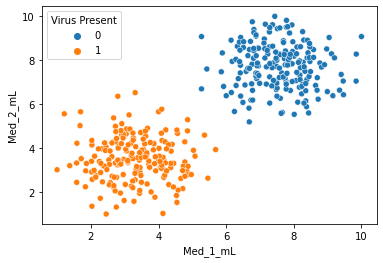

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue = 'Virus Present', data = df)

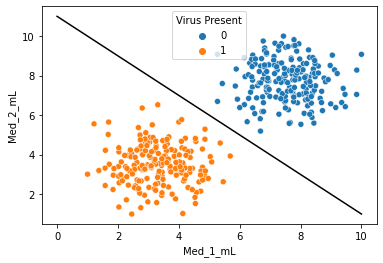

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue = 'Virus Present', data = df)


#creating hyperplane
x = np.linspace(0,10,100)

m= -1
b = 11
y = m*x + b

plt.plot(x,y,'black')

In [7]:
from sklearn.svm import SVC

In [8]:
y = df['Virus Present']

In [9]:
X =  df.drop('Virus Present', axis =1)

In [10]:
model = SVC(kernel='linear', C = 1000)

In [11]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [12]:
from svm_margin_plot import plot_svm_boundary 

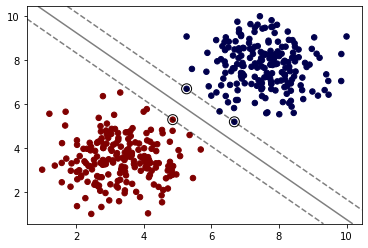

In [13]:
plot_svm_boundary(model, X,y)

In [21]:
model = SVC(kernel='linear', C = 0.005)
model.fit(X,y)


SVC(C=0.005, kernel='linear')

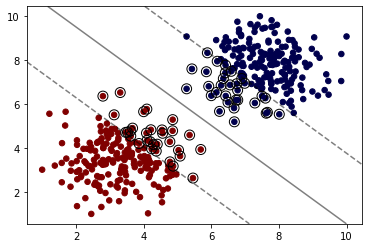

In [22]:
plot_svm_boundary(model,X,y)

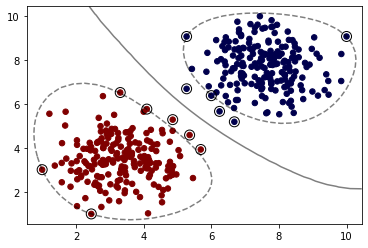

In [32]:
model = SVC(kernel = 'rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

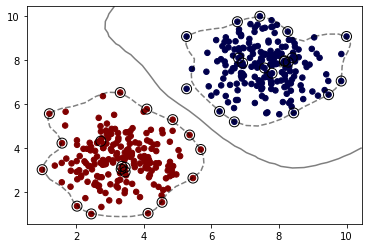

In [33]:
model = SVC(kernel = 'rbf', C=1, gamma = 'auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

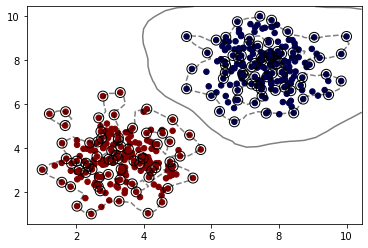

In [34]:
model = SVC(kernel = 'rbf', C=1, gamma = 2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

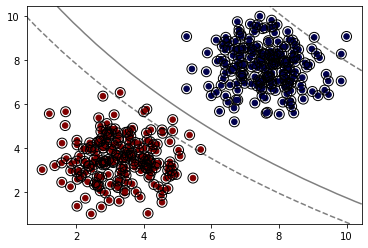

In [35]:
model = SVC(kernel= 'sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

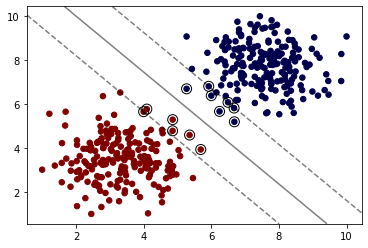

In [36]:
model = SVC(kernel='poly',C=1,degree =1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

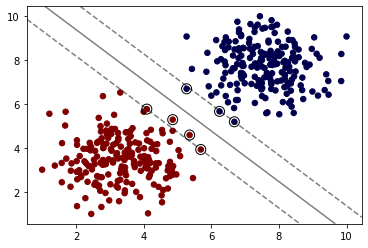

In [37]:
model = SVC(kernel='poly',C=4,degree =1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear', 'rbf']}

In [41]:
grid = GridSearchCV(svm,param_grid)

In [42]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [43]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [10]:
df = pd.read_csv('C:/Users/sandip kumar Gupta/Desktop/Pierian-Data-Courses/pierian-course/DATA/cement_slump.csv')

In [11]:
df.head(
)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

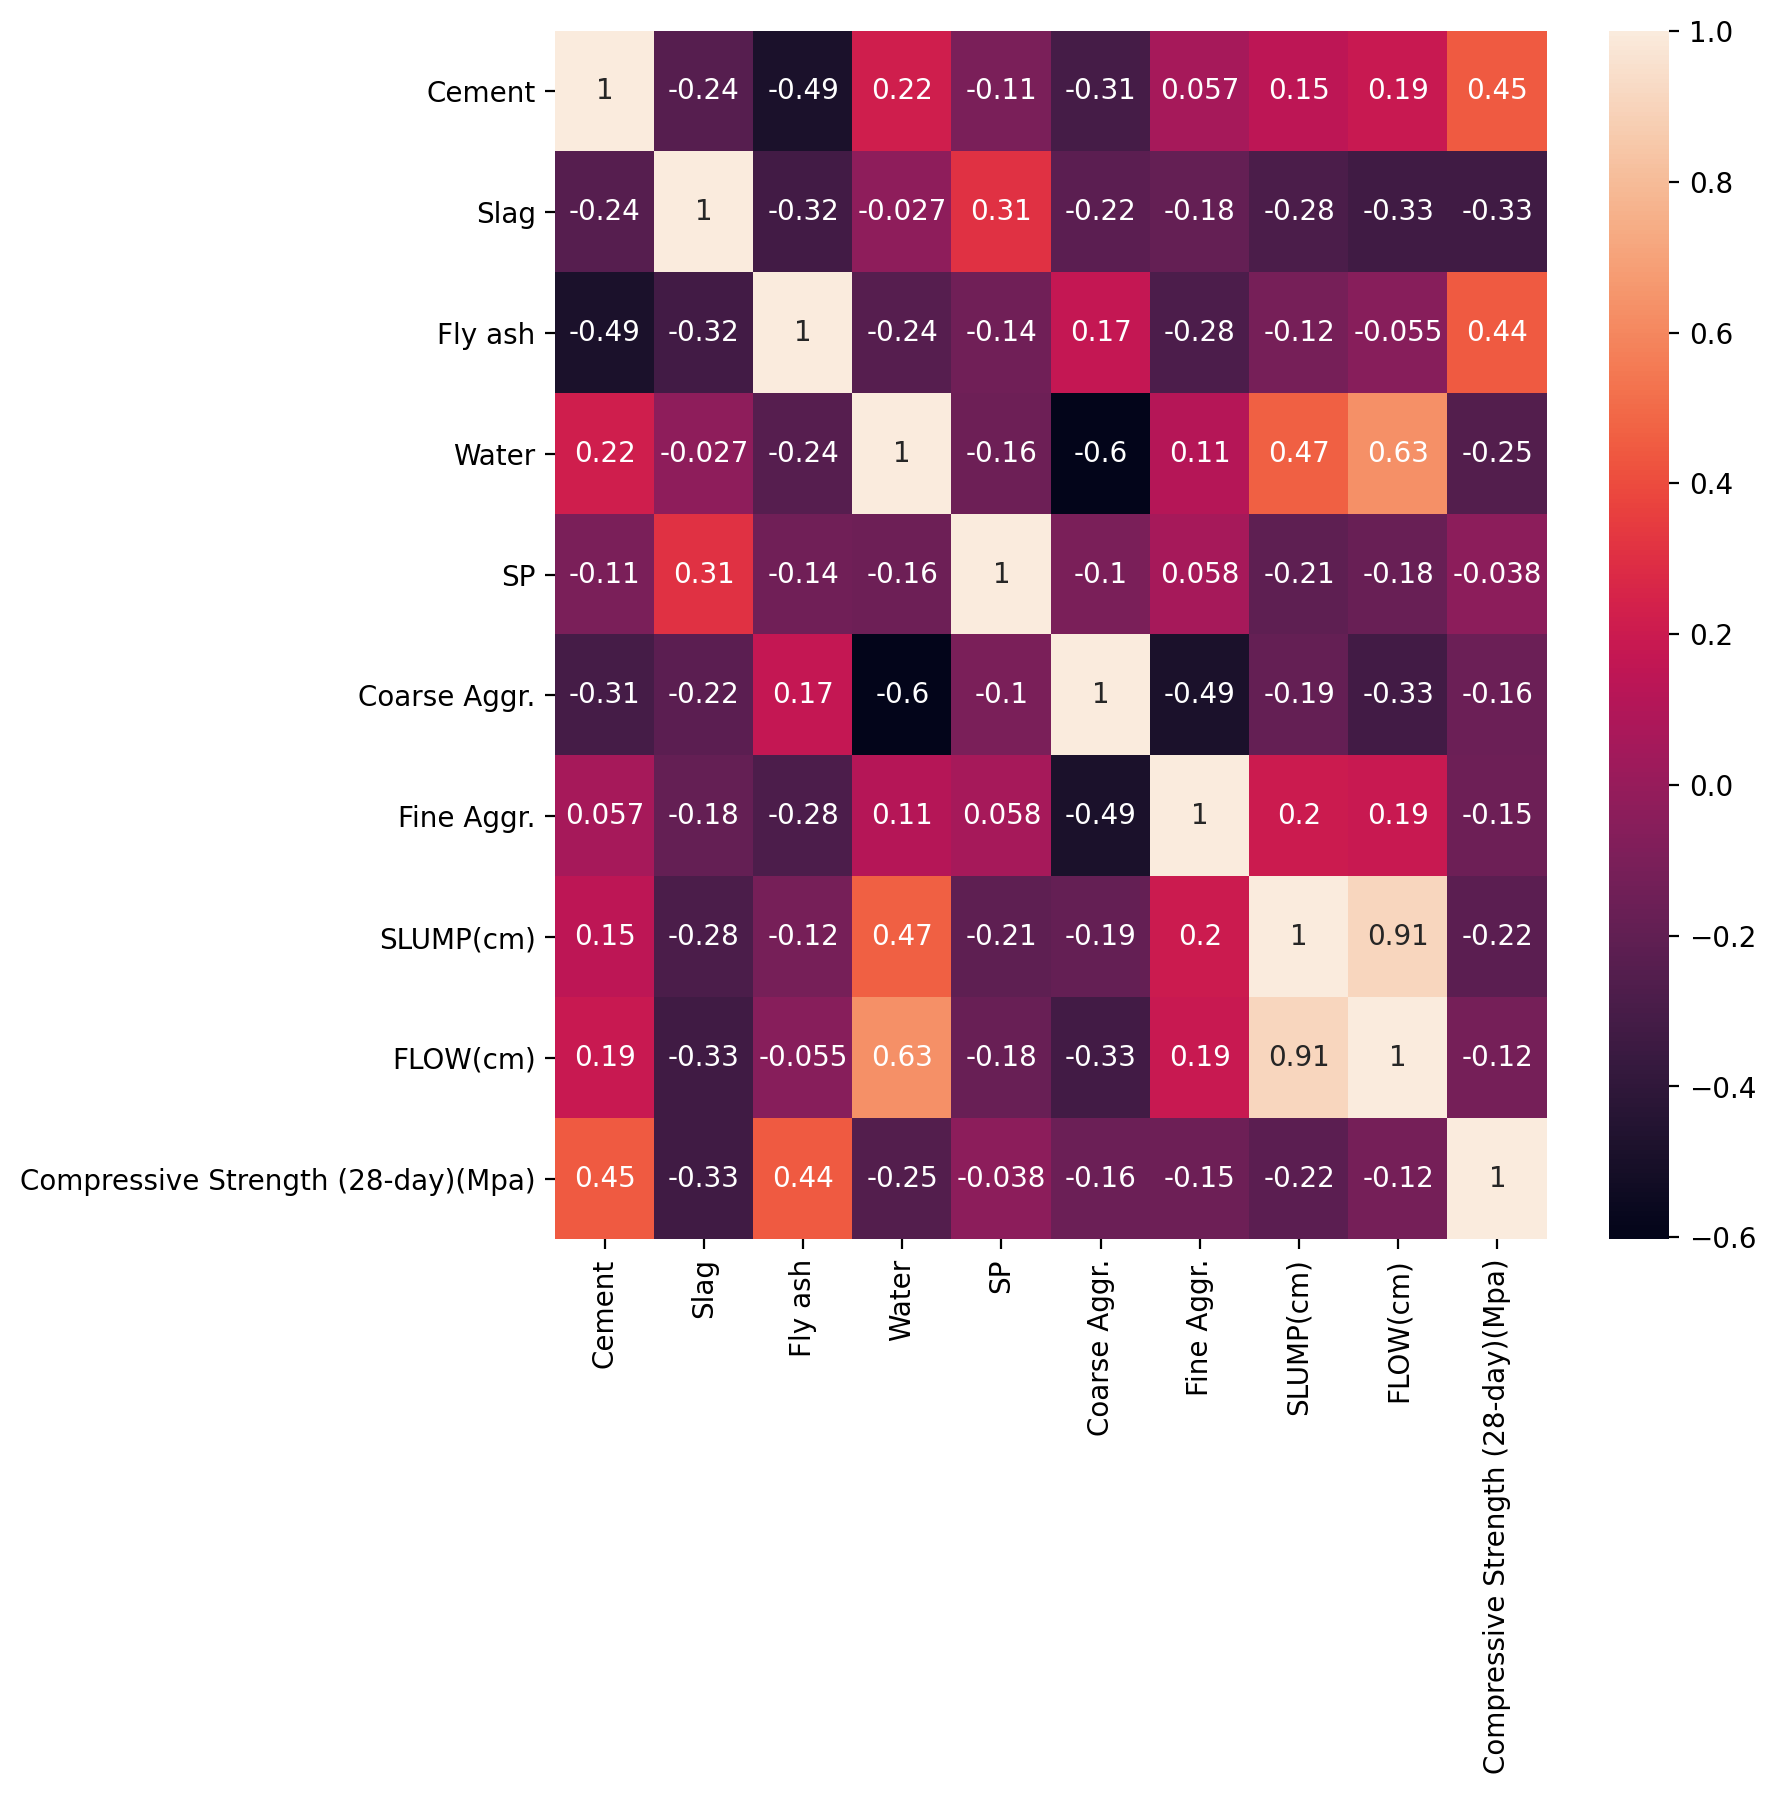

In [12]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [13]:
df.columns 

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [14]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis =1)

In [15]:
y =  df['Compressive Strength (28-day)(Mpa)']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.fit_transform(X_test)

In [22]:
from sklearn.svm import SVR, LinearSVR

In [23]:
#help(SVR)

In [24]:
base_model = SVR()

In [25]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [26]:
base_preds = base_model.predict(scaled_X_test) 

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test,base_preds)

5.168789741025255

In [29]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.750129049373485

In [30]:
y_test.mean()

36.26870967741935

In [31]:
pram_grid= {'C':[0.002,0.02,0.2,0.5,1],
            'kernel':['linear','rbf','poly'],
            'gamma':['scale','auto'],
           'degree':[2,3,4],
           'epsilon':[0,0.01,0.1,0.5,2]}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
svr= SVR()

In [34]:
grid = GridSearchCV(svr,pram_grid)

In [35]:
 grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.002, 0.02, 0.2, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [36]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [37]:
grid_preds = grid.predict(scaled_X_test)

In [38]:
mean_absolute_error(y_test,grid_preds)

2.802170403491858

In [39]:
 np.sqrt(mean_squared_error(y_test,grid_preds))

3.7329013020125363

In [ ]:
#009

In [2]:
df = pd.read_csv('C:/Users/sandip kumar Gupta/Desktop/Pierian-Data-Courses/pierian-course/DATA/wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [19]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


<AxesSubplot:xlabel='quality', ylabel='count'>

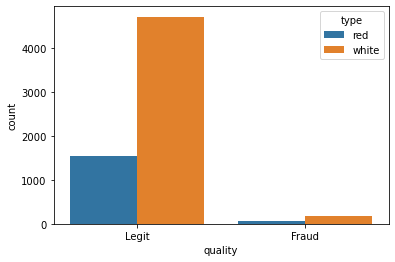

In [7]:
sns.countplot(x='quality',data=df,hue='type' )

In [8]:
reds = df[df['type']=='red']

In [9]:
whites = df[df['type']=='white']

In [10]:
100*len(reds[reds['quality'] == 'Fraud'])/len(reds)

3.9399624765478425

In [11]:
100*len(whites[whites['quality'] == 'Fraud'])/len(whites)

3.736218864842793

In [14]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


In [16]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

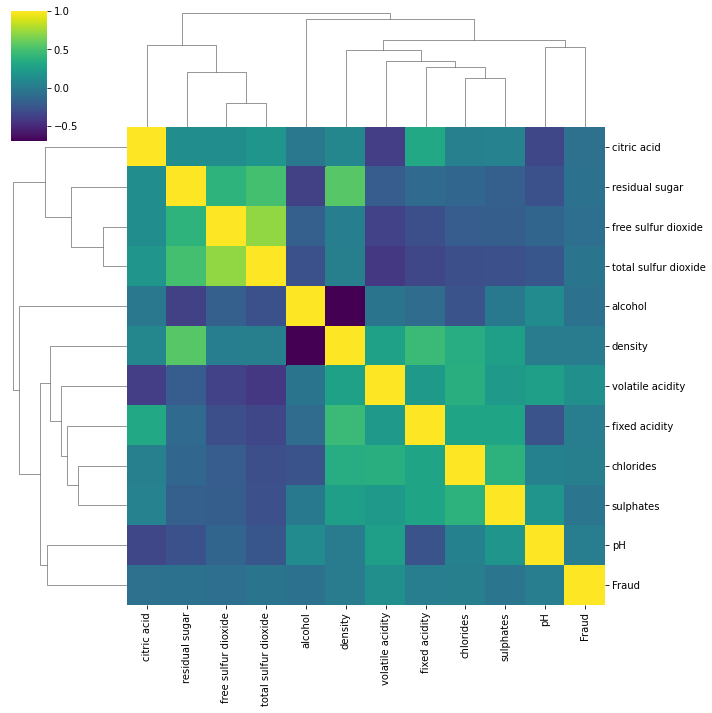

In [17]:
sns.clustermap(df.corr(),cmap = 'viridis')

In [20]:
df = df.drop('Fraud',axis=1)

In [21]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [22]:
X = df.drop('quality',axis =1)

In [23]:
y = df['quality']

In [24]:
 from sklearn.model_selection import train_test_split

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X_train =  scaler.fit_transform(X_train)

In [30]:
scaled_X_test = scaler.transform(X_test)

In [31]:
from sklearn.svm import SVC

In [33]:
svc = SVC(class_weight ='balanced')

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}

In [36]:
grid = GridSearchCV(svc, param_grid)

In [37]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [39]:
grid.best_params_

{'C': 1}

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [41]:
grid_preds = grid.predict(scaled_X_test)

In [42]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

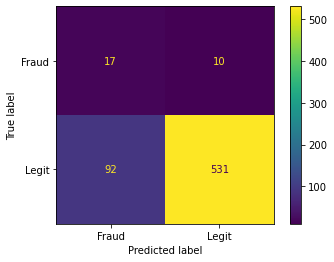

In [44]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [45]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

